## Exercises 2

If you have successfully completed the previous lab, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [3]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n= X.shape[1]
    m=X.shape[0]
    # =========================== YOUR CODE HERE =====================
    mu=np.mean(X,axis=1)
    sigma=np.std(X,axis=1)
    for i in range(n):
        for j in range(m):
            X_norm[j][i]= X[j][i]-mu[i]
            X_norm[j][i]= X[j][i]/sigma[i]
            
        
    
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [4]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [1053.5  801.5 1201.5  709.  1502.   994.5  768.5  715.   691.5  748.5
  972.  1001.5  946.5 2241.5  635.5 1152.   661.   619.5 1306.5 1517.5
  885.   945.   803.5  983.  1946.5  551.5  730.5 1264.5 1101.5 1320.
  920.5  500.5 1022.  1570.   907.5  720.   621.  1068.  2109.5 1083.
  833.  1120.5 1285.5  601.5  427.   928.   603. ]
Computed standard deviation: [1050.5  798.5 1198.5  707.  1498.   990.5  765.5  712.   688.5  745.5
  968.   998.5  943.5 2236.5  632.5 1148.   659.   616.5 1302.5 1513.5
  882.   943.   800.5  979.  1943.5  548.5  727.5 1261.5 1098.5 1317.
  918.5  499.5 1018.  1567.   903.5  717.   618.  1064.  2105.5 1079.
  831.  1117.5 1281.5  598.5  425.   924.   600. ]


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [5]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [6]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = X.dot(theta)
    error = h - y
    J = (1/(2*m))* error.T.dot(error)
    
    # ==================================================================
    return J


<a id="gradientDescentMulti"></a>

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        h=X.dot(theta)
        errors= h - y
        theta= theta - (alpha/m)* X.T.dot(errors)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

theta computed from gradient descent: [7.12191178e+04 1.41342587e+05 1.16477795e+02]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $[2.33286838e+08]


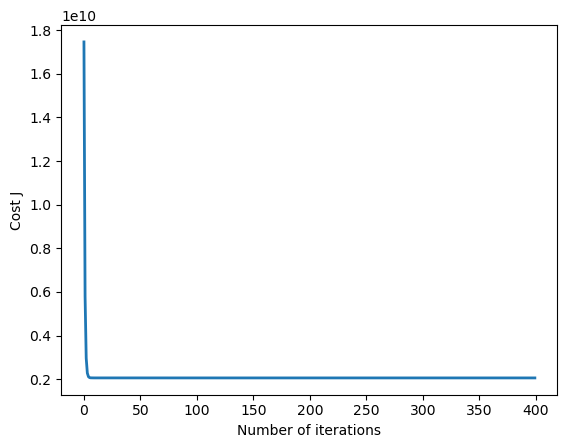

In [8]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
x=np.array([[1],[1650],[3]])
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = 0   # You should change this
price = theta.dot(x)
# ===================================================================

print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price}')

<a id="section7"></a>
### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [9]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [10]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    h=np.linalg.inv(X.T.dot(X))
    xy = X.T.dot(y)
    theta= h.dot(xy)
    
    # =================================================================
    return theta

Optional (ungraded) exercise: Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [11]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
x=np.array([[1],[1650],[3]])
price = 0 # You should change this
price = theta.dot(x)
# ============================================================

print(f'Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${price}')

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $[293081.4643349]
